In [63]:
import numpy as np
import matplotlib.pyplot as plt
from stiffness_matrix import stiffness_matrix
from load_vector import load_vector

# Example using a solution with constant rhs

Let $c_1=-\frac{e^2 + e}{e^2 + e + 1}$, $c_1=-\frac{1}{e^2 + e + 1}$, and
$$
u(x)=c_1e^{-x} + c_2 e^{2x} + 1
$$
Then, using $\alpha=1$, $b=1$ and $c=2$, we have
$$
f(x)=-(Lu)(x) = 2
$$
This results in the elemental load vector
$$
\vec{F}^{K_i} = h_i (1, 1)^T
$$

In [64]:
M = 30  # Number of nodes (including end points)
X = np.sort(np.random.random(M))  # Array of random nodes from 0 to 1
X[[0, -1]] = [0, 1]
H = np.diff(X)

def f(x):  # RHS of the equation above
    return 2

A = stiffness_matrix(alpha=1, b=1, c=2, H=H, M=M)
F = load_vector(f, X, M)
U = np.linalg.solve(A, F)

In [66]:
def u(x):
    return (-np.exp(2*x)) / (np.exp(1) + np.exp(2) + 1) + np.exp(-x) * (-np.exp(1)- np.exp(2)) / (np.exp(1) + np.exp(2) + 1) + 1

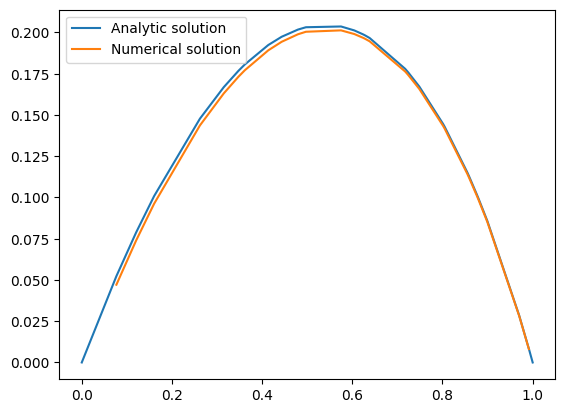

In [67]:
plt.plot(X, u(X), label="Analytic solution")
plt.plot(X[1:-1], U, label="Numerical solution")
plt.legend()